# Feature Analysis of wine costing more than 20 euros

### Packages

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
#######################
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# general NLP preprocessing and basic tools
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# train/test split
import sklearn as skl
from sklearn.model_selection import train_test_split
# basic machine learning models
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
# our evaluation metric for sentiment classification
from sklearn.metrics import f1_score, fbeta_score, confusion_matrix


### Loading Data

In [ ]:
train_df = pd.read_csv('winemag-data_first150k.csv').drop(columns=['Unnamed: 0'])
test_df = pd.read_csv('winemag-data-130k-v2.csv').drop(columns=['Unnamed: 0'])

In [ ]:
train_df.columns


Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

### Data Analysis


In [ ]:
train_df=train_df[train_df['price']>20]
test_df=test_df[test_df['price']>20]

In [ ]:
print("Number of reviwes in training set:", len(train_df))
print("Number of reviewa in testing set:", len(test_df))
print("Total number of reviews:", len(train_df)+len(test_df))

Number of reviwes in training set: 78420
Number of reviewa in testing set: 74634
Total number of reviews: 153054


In [ ]:
train_df.head(10)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


In [ ]:
test_df.head(10)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam
11,France,"This is a dry wine, very spicy, with a tight, ...",NaN,87,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Leon Beyer 2012 Gewurztraminer (Alsace),Gewürztraminer,Leon Beyer
12,US,"Slightly reduced, this wine offers a chalky, t...",NaN,87,34.0,California,Alexander Valley,Sonoma,Virginie Boone,@vboone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini
15,Germany,Zesty orange peels and apple notes abound in t...,Devon,87,24.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Richard Böcking 2013 Devon Riesling (Mosel),Riesling,Richard Böcking
16,Argentina,"Baked plum, molasses, balsamic vinegar and che...",Felix,87,30.0,Other,Cafayate,NaN,Michael Schachner,@wineschach,Felix Lavaque 2010 Felix Malbec (Cafayate),Malbec,Felix Lavaque
18,Spain,"Desiccated blackberry, leather, charred wood a...",Vendimia Seleccionada Finca Valdelayegua Singl...,87,28.0,Northern Spain,Ribera del Duero,NaN,Michael Schachner,@wineschach,Pradorey 2010 Vendimia Seleccionada Finca Vald...,Tempranillo Blend,Pradorey
19,US,"Red fruit aromas pervade on the nose, with cig...",NaN,87,32.0,Virginia,Virginia,NaN,Alexander Peartree,NaN,Quiévremont 2012 Meritage (Virginia),Meritage,Quiévremont
20,US,Ripe aromas of dark berries mingle with ample ...,Vin de Maison,87,23.0,Virginia,Virginia,NaN,Alexander Peartree,NaN,Quiévremont 2012 Vin de Maison Red (Virginia),Red Blend,Quiévremont


In [ ]:
import matplotlib.pyplot as plt # plotting
from mpl_toolkits.mplot3d import Axes3D
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


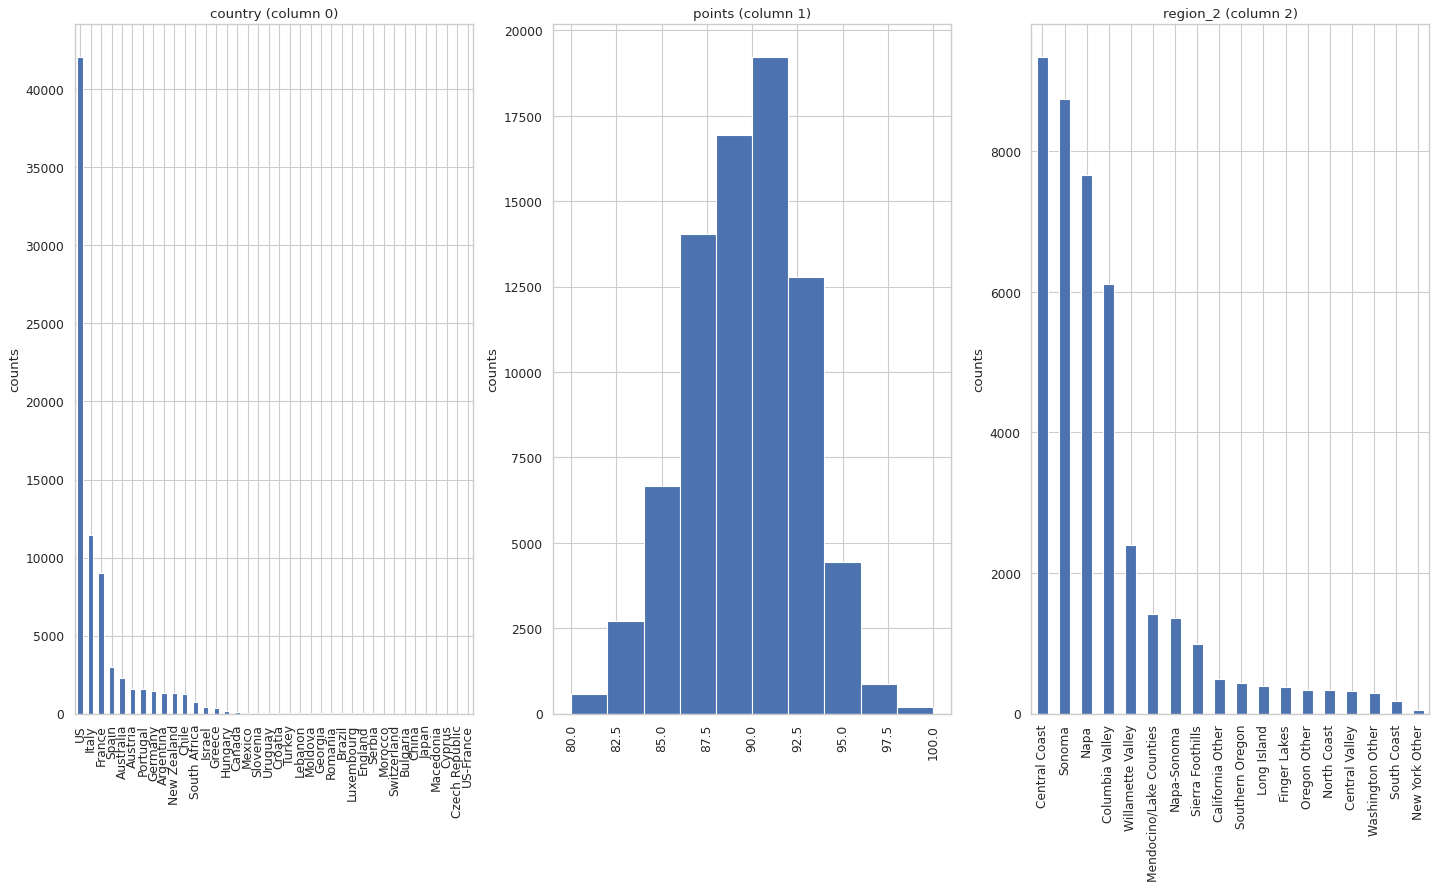

In [ ]:
plotPerColumnDistribution(train_df, 10, 5)

In [ ]:
print("Number of missing values: ", train_df.isnull().sum().sum())


Number of missing values:  65564


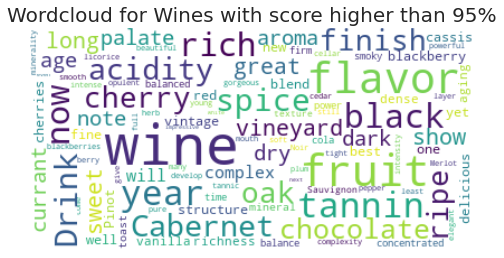

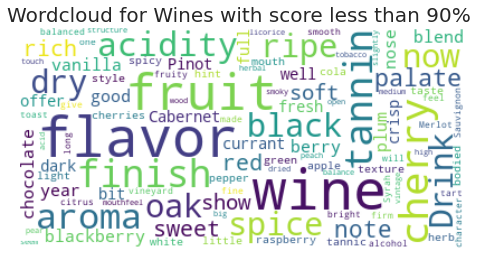

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

from PIL import Image
#mask_dir = np.array(Image.open('twitter_mask3.jpg'))

wordcloud1 = WordCloud(stopwords=stopwords,max_font_size=50,max_words=100,collocations=False, background_color='white').generate(" ".join(review for review in train_df[train_df.points>=95]['description']))
# plt.subplot(1,3,2)
plt.figure(figsize=(8,8))
plt.title("Wordcloud for Wines with score higher than 95%", fontsize=20)
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud2 = WordCloud(stopwords=stopwords,max_font_size=50,max_words=100,collocations=False, background_color='white').generate(" ".join(review for review in train_df[train_df.points<=90]['description']))
# plt.subplot(1,3,3)
plt.figure(figsize=(8,8))
plt.title("Wordcloud for Wines with score less than 90% ", fontsize=20)
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.show()






## Data Preprocessing

Converting numerical score into categorcal label

In [ ]:
def target_conversion(x):
  if x<85:
    return -1
  elif x<95:
    return 0
  else:
    return 1

target_conversion_positive = {
    0: 1,
    1: 2,
    -1: 0
}

# Naibe Bayes converts labels to 0/1/-1 whereas LSTM and BERT convert to 0/1/2 because they cannot have negative labels
train_df['class_NB'] = train_df['points'].map(target_conversion)
test_df['class_NB'] = test_df['points'].map(target_conversion)
train_df['class_lstm'] = train_df['class_NB'].map(target_conversion_positive)
test_df['class_lstm'] = test_df['class_NB'].map(target_conversion_positive)


In [ ]:
test_df.shape

(74634, 21)

In [ ]:
# Handling Missing Values :
def fillna(df) :
    show = df.count() - df.isna().count()
    print("Here's the count list of missing values{}".format(show.to_frame()))
    #values = {"score": 0, "text": "Negative"}
    #df.fillna(value=values)

In [ ]:
fillna(test_df)

Here's the count list of missing values                           0
country                  -40
description                0
designation           -17537
points                     0
price                      0
province                 -40
region_1               -8377
region_2              -37533
taster_name           -16439
taster_twitter_handle -19099
title                      0
variety                    0
winery                     0
text_pp                    0
text_tokenized             0
text_nonstop               0
text_lemmatized            0
text_stemmed               0
processed                  0
class_NB                   0
class_lstm                 0


**Correlation/ Relationships between different features and with the label (class) cannot be done using non numerical features**

### Non numerical data handling

In [ ]:
def handle_non_numerical_data(new_df):
    df=new_df.copy()
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

df = handle_non_numerical_data(train_df)

In [ ]:
train_df

,country,description,designation,points,price,province,region_1,region_2,variety,winery,class_NB,class_lstm
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,1,2
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,1,2
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,1,2
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,1,2
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
150921,France,Shows some older notes: a bouquet of toasted w...,Blanc de Blancs Brut Mosaïque,91,38.0,Champagne,Champagne,NaN,Champagne Blend,Jacquart,0,1
150923,France,"Rich and toasty, with tiny bubbles. The bouque...",Demi-Sec,91,30.0,Champagne,Champagne,NaN,Champagne Blend,Jacquart,0,1
150924,France,"Really fine for a low-acid vintage, there's an...",Diamant Bleu,91,70.0,Champagne,Champagne,NaN,Champagne Blend,Heidsieck & Co Monopole,0,1
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain,0,1


In [ ]:
df

,country,description,designation,points,price,province,region_1,region_2,variety,winery,class_NB,class_lstm
0,38,26236,2570,96,235.0,207,708,3,121,9003,1,2
1,3,46283,18968,96,110.0,299,370,0,350,1805,1,2
2,38,22060,4704,96,90.0,207,51,18,146,2857,1,2
3,38,28092,8624,96,65.0,266,701,15,40,4486,1,2
4,9,43232,17087,95,66.0,179,127,0,232,875,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
150921,9,42591,15679,91,38.0,8,33,0,152,2431,0,1
150923,9,28583,6640,91,30.0,8,33,0,152,2431,0,1
150924,9,7046,7913,91,70.0,8,33,0,152,5616,0,1
150926,9,13015,18654,91,27.0,8,33,0,152,1328,0,1


In [ ]:
df.drop(columns=['designation','region_2'])

,country,description,points,price,province,region_1,variety,winery,class_NB,class_lstm
0,38,26236,96,235.0,207,708,121,9003,1,2
1,3,46283,96,110.0,299,370,350,1805,1,2
2,38,22060,96,90.0,207,51,146,2857,1,2
3,38,28092,96,65.0,266,701,40,4486,1,2
4,9,43232,95,66.0,179,127,232,875,1,2
...,...,...,...,...,...,...,...,...,...,...
150921,9,42591,91,38.0,8,33,152,2431,0,1
150923,9,28583,91,30.0,8,33,152,2431,0,1
150924,9,7046,91,70.0,8,33,152,5616,0,1
150926,9,13015,91,27.0,8,33,152,1328,0,1


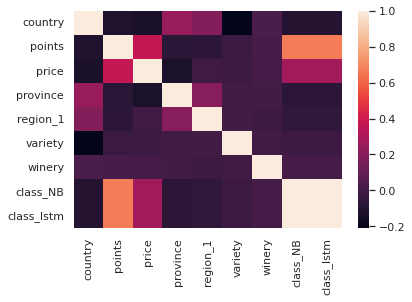

In [ ]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()

corr = df.drop(columns=['designation','description','region_2']).corr()

# plot the heatmap
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns)

# Regression

In [ ]:
df_1=df.drop(columns=['country','description','designation','region_2','winery','class_NB','class_lstm'])

In [ ]:
df_1

,points,price,province,region_1,variety
0,96,235.0,207,708,121
1,96,110.0,299,370,350
2,96,90.0,207,51,146
3,96,65.0,266,701,40
4,95,66.0,179,127,232
...,...,...,...,...,...
150921,91,38.0,8,33,152
150923,91,30.0,8,33,152
150924,91,70.0,8,33,152
150926,91,27.0,8,33,152


In [ ]:
def preprocess(df, mode='naive'):
    # remove the rows with nan and duplicates
    if mode == 'naive':
        df_naive = df.dropna().drop_duplicates()
        X = df_naive.drop(columns=['price']).values
        y = df_naive['points'].values
    # replace nan with the mean of the corresponding column
    elif mode == 'mean':
        column_means = df.mean(axis=0)
        df_mean = df.fillna(column_means, axis=0)
        X = df_naive.drop(columns=['price'])
        y = df_naive['points']
    return X, y

In [ ]:
X, y = preprocess(df_1, mode='naive') # mode = 'naive' or "mean"
print(df_1.shape)
print(X.shape)
print(y.shape)

(78420, 5)
(39923, 4)
(39923,)


In [ ]:
# scaling data to bring all features in the same standing
from sklearn.preprocessing import StandardScaler

X_scale = StandardScaler().fit_transform(X)

In [ ]:
ystd = 1.0
def compute_rmse(y, ypred, ystd=1.):
    return np.mean((y - ypred)**2)**0.5 * ystd

In [ ]:
############ Try different models ############
# model = Lasso(alpha=0.1)  # complexity 0(n)
# model = Ridge(alpha=0.1)  # complexity 0(n)
# model = SVR(kernel='rbf', C=1.0)
# model = DecisionTreeRegressor(max_depth=10, min_samples_leaf=5) # complexity O(ndlogn)
model = RandomForestRegressor(max_depth=10, min_samples_leaf=5, n_estimators=10)
# model = GradientBoostingRegressor(max_depth=10, min_samples_leaf=5, n_estimators=10)
# model = MLPRegressor(max_iter=30, hidden_layer_sizes=(100,))  # complexity 0(n*n1 + n1*n2* + ...) ~= O(Kn)
# MLPRegressor(max_iter=30, validation_fraction=0.2, early_stopping=True, tol=1e-4, n_iter_no_change=5,
#                     hidden_layer_sizes=(300, 100, 100, ), learning_rate_init=1e-3, random_state=0, verbose=1)
###############################################

model.fit(X_scale, y)
y_train_pred = model.predict(X_scale)
#y_val_pred = model.predict(X_val)
print(f'Train RMSE: {compute_rmse(y, y_train_pred, ystd=1.0):.3f}')
#print(f'Valid RMSE: {compute_rmse(y_val, y_val_pred, ystd=1.0):.3f}')

NameError: ignored

## Classification

In [ ]:
pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import spacy
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import re
import string
from emoji import demojize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
punc_list = string.punctuation
ps = nltk.PorterStemmer()
ls = nltk.LancasterStemmer()
wn = nltk.WordNetLemmatizer()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
chat_dict = dict([("hmmyou",""),("sry","sorry"),("inlove","in love"),("thats",""),("wanna",""),
                  ("soo","so"),("inlove","in love"),("amazingwell","amazing well"),
                  ("messagesorry","message sorry"),("½",""),("tomorrowneed","tomorrow need"),
                  ("tomorrowis","tomorrow is"),("amusedtime","amused time"),("weekendor","weekend or"),
                  ("competitionhope","competition hope"),("partypicnic","party picnic"),
                  ("ahmazing","amazing"),("wont","will not"),("didnt","did not"),("dont","do not"),
                  ("lookin","looking"),("u","you"),("youre","you are"),("nite","night"),("isnt","is not"),
                  ("k",""),("is",""),("doesnt","does not"),("l",""),("x",""),("c",""),("ur","your"),
                  ("e",""),("yall","you all"),("he",""),("us",""),("okim","ok i am"),("jealousi","jealous"),
                  ("srry","sorry"),("itll","it will"),("vs",""),("weeknend","weekend"),("w",""),
                  ("yr","year"),("youve","you have"),("havent","have not"),("iï",""),("gonna","going to"),
                  ("gimme","give me"),("ti",""),("ta",""),("thru","through"),("th",""),("imma","i am going to"),
                  ("wasnt","was not"),("arent","are not"), ("bff","best friend forever"),("sometimesdid","sometimes did"),
                  ("waitt","wait"),("bday","birthday"),("toobut","too but"),("showerand","shower and"),
                  ("innit","is not it"),("surgury","surgery"),("soproudofyo","so proud of you"),("p",""),
                  ("couldnt","could not"),("dohforgot","forgot"),("rih","right"),("b",""),("bmovie","movie"),
                  ("pleaseyour","please your"),("tonite","tonight"),("grea","great"),("se",""),("soonso","soon so"),
                  ("gettin","getting"),("blowin","blowing"),("coz","because"),("thanks","thank"),("st",""),("rd",""),
                  ("gtta","have got to"),("gotta","have got to"),("anythingwondering","anything wondering"),
                  ("annoyedy","annoyed"),("p",""),("beatiful","beautiful"),("multitaskin","multitasking"),
                  ("nightmornin","night morning"),("thankyou","thank you"),("iloveyoutwoooo","i love you two"),
                  ("tmwr","tomorrow"),("wordslooks","words looks"),("ima","i am going to"),("liek","like"),("mr",""),
                  ("allnighter","all nighter"),("tho","though"),("ed",""),("fyou",""),("footlong","foot long"),
                  ("placepiggy","place piggy"),("semiflaky","semi flaky"),("gona","going to"),("tmr","tomorrow"),
                  ("ppl","people"),("n",""),("dis","this"),("dun","done"),("houseee","house"),("havee","have"),
                  ("studyingwhew","studying whew"),("awwyoure","aww you are"),("softyi","softy"),
                  ("weddingyou","wedding you"),("hassnt","has not"),("lowerleft","lower left"),("anywayss","anyway"),
                  ("adoarble","adorable"),("blogyeahhhh","blog yeahhhh"),("billsim","bills i am"),("ps",""),
                  ("cheescake","cheesecake"),("morningafternoonnight","morning after noon night"),
                  ("allstudying","all studying"),("ofcoooursee","of course"),("jst","just"),("shes","she is"),
                  ("sonicswhich","sonics which"),("ouchwaited","ouch waited"),("itll","it will"),("orreply","or reply"),
                  ("somethin","something"),("fridayand","friday and"),("outta","out of"),("herenever","here never"),
                  ("ain't","am not "),("aren't","are not"),("can't","cannot"),("can't've","cannot have"),("'cause","because"),
                  ("could've", "could have"),("couldn't", "could not"),("couldn't've", "could not have"),("didn't", "did not"),
                  ("doesn't", "does not"),("don't", "do not"),("hadn't", "had not"),("hadn't've", "had not have"),("hasn't", "has not"),
                  ("haven't", "have not"),("he'd", "he had / he would"),("he'd've", "he would have"),("he'll", "he shall / he will"),
                  ("he'll've", "he will have"),("he's", "he has / he is"),("how'd", "how did"),("how'd'y", "how do you"),
                  ("how'll", "how will"),("how's", "how is"),("i'd", "I had"),("i'd've", "I would have"),("i'll", "I will"),
                  ("i'll've", "I will have"),("i'm", "I am"),("i've", "I have"),("isn't", "is not"),("it'd", "it would"),("it'd've", "it would have"),
                  ("it'll", "it will"),("it'll've", "it will have"),("it's", "it is"),("let's", "let us"),("ma'am", "madam"),
                  ("mayn't", "may not"),("might've", "might have"),("mightn't", "might not"),("mightn't've", "might not have"),
                  ("must've", "must have"),("mustn't","must not"),("mustn't've", "must not have"),("needn't", "need not"),
                  ("needn't've", "need not have"),("o'clock", "of the clock"),("oughtn't", "ought not"),("oughtn't've", "ought not have"),
                  ("shan't", "shall not"),("sha'n't", "shall not"),("shan't've", "shall not have"),("she'd", "she would"),
                  ("she'd've", "she would have"),("she'll", "she will"),("she'll've","she will have"),("she's", "she is"),
                  ("should've", "should have"),("shouldn't","should not"),("shouldn't've", "should not have"),("so've", "so have"),
                  ("so's", "so is"),("that'd", "that had"),("that'd've","that would have"),("that's", "that is"),("there'd", "there would"),
                  ("there'd've", "there would have"),("there's", "there is"),("they'd", "they had"),("they'd've", "they would have"),
                  ("they'll", "they will"),("they'll've", "they will have"),("they're", "they are"),("they've", "they have"),
                  ("to've", "to have"),("wasn't", "was not"),("we'd", "we had / we would"),("we'd've", "we would have"),
                  ("we'll", "we will"),("we'll've", "we will have"),("we're", "we are"),("we've", "we have"),("weren't", "were not"),
                  ("what'll", "what will"),("what'll've", "what will have"),("what're", "what are"),("what's", "what is"),
                  ("what've", "what have"),("when's", "when is"),("when've", "when have"),("where'd", "where did"),("where's", "where is"),
                  ("where've", "where have"),("who'll", "who will"),("who'll've", "who will have"),("who's", "who is"),("who've", "who have"),
                  ("why's", "why is"),("why've", "why have"),("will've", "will have"),("won't", "will not"),("won't've", "will not have"),
                  ("would've", "would have"),("wouldn't", "would not"),("wouldn't've", "would not have"),("y'all", "you all"),("y'all'd", "you all would"),
                  ("y'all'd've", "you all would have"),("y'all're", "you all are"),("y'all've", "you all have"),("you'd", "you had"),
                  ("you'd've", "you would have"),("you'll", "you will"),("you'll've", "you will have"),("you're", "you are"),("you've", "you have")
                ])

ABBREV_DICT = dict([("AFAIK","As Far As I Know"),("AFK","Away From Keyboard"),("ASAP","As Soon As Possible"),
                  ("ATK","At The Keyboard"),("ATM","At The Moment"),("A3","Anytime, Anywhere, Anyplace"),
                  ("BAK","Back At Keyboard"),("BBL","Be Back Later"),("BBS","Be Back Soon"),("BFN","Bye For Now"),
                  ("B4N","Bye For Now"),("BRB","Be Right Back"),("BRT","Be Right There"),("BTW","By The Way"),
                  ("B4","Before"),("B4N","Bye For Now"),("CU","See You"),("CUL8R","See You Later"),("CYA","See You"),
                  ("FAQ","Frequently Asked Questions"),("FC","Fingers Crossed"),("FWIW","For What It's Worth"),
                  ("FYI","For Your Information"),("GAL","Get A Life"),("GG","Good Game"),("GN","Good Night"),
                  ("GMTA","Great Minds Think Alike"),("GR8","Great!"),("G9","Genius"),("IC","I See"),
                  ("ICQ","I Seek you"),("ILU","I Love You"),("IMHO","In My Honest Opinion"),("IMO","In My Opinion"),
                  ("IOW","In Other Words"),("IRL","In Real Life"),("KISS","Keep It Simple, Stupid"),("LDR","Long Distance Relationship"),
                  ("LMAO","Laugh My fuck Off"),("LOL","Laughing Out Loud"),("LTNS","Long Time No See"),("L8R","Later"),
                  ("MTE","My Thoughts Exactly"),("M8","Mate"),("NRN","No Reply Necessary"),("OIC","Oh I See"),
                  ("PITA","Pain In The fuck"),("PRT","Party"),("PRW","Parents Are Watching"),("ROFL","Rolling On The Floor Laughing"),
                  ("ROFL","Rolling On The Floor Laughing"),("ROFLOL","Rolling On The Floor Laughing Out Loud"),
                  ("ROTFLMAO","Rolling On The Floor Laughing My fuck Off"),("SK8","Skate"),("STATS","Your sex and age"),
                  ("ASL","Age, Sex, Location"),("THX","Thank You"),("THKS","thank you"),("TTFN","Ta-Ta For Now!"),
                  ("TTYL","Talk To You Later"),("U","You"),("U2","You Too"),("U4E","Yours For Ever"),
                  ("WB","Welcome Back"),("WTF","What The fuck"),("WTG","Way To Go!"),("WUF","Where Are You From?"),
                  ("WKDN","Week-End"),("W8","Wait..."),("7K","Sick Laugher")
                ])

In [ ]:
# Remove urls
def remove_urls(text):
    return re.sub(r'https?://\S+|www\.\S+', '', text)


# Remove mentions
def remove_usernames(text):
    text = re.sub(r'@[A-Za-z0-9]+', ' ', text)
    return text


# Remove punctuations
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punc_list))


# Convert emojis to texts
def convert_emojis(text):
    return demojize(text).replace(":","")


# Replace incorrect and abbreviated words
def replace_words(text):
    tokens = text.split()
    for i, token in enumerate(tokens):
        for key1 in chat_dict:
            if token.lower() == key1:
                tokens[i] = chat_dict[key1]
        for key2 in ABBREV_DICT:
            if token.upper() == key2:
                tokens[i] = ABBREV_DICT[key2]
    return ' '.join(tokens)


# Remove stopwords
def remove_stopwords(text):
    stopword = stopwords.words('english')
    words_to_keep = ["not","no","nor"]
    stopword = [elem for elem in stopword if not elem in words_to_keep]
    stopword.extend(["im","theyre","ive","p","alot","er",""]) # Other stopwords to remove

    list_words=[]
    for token in text:
        if token.lower() not in stopword:    #checking whether the word is not
            list_words.append(token)                    #present in the stopword list.
    #Join items in the list
    return list_words

# Remove HTML tags
def remove_html(text_to_clean):
  CLEANR = re.compile('<.*?>')
  cleantext = re.sub(CLEANR, ' ', text_to_clean)
  return cleantext

# Tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text




# Lemmatization
def lemmatize(text):
    text=[wn.lemmatize(token) for token in text]
    return text


# Stemming
def stemming(text):
    text = [ls.stem(word) for word in text]
   # text = [ls.stem(word) for word in text]
    return text




In [ ]:
def full_preprocessing(text):
    """
    @param    text (str): a string to be processed.
    @return   text (Str): the processed string.
    """
    # Remove non-ascii words
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)

    # Replace '&amp;' with 'and'
    text = re.sub(r'&amp;', 'and', text)

    # Remove trailing whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    text = remove_urls(text)
    text = remove_usernames(text)
    text = remove_punctuation(text)
    text = convert_emojis(text)
    text = replace_words(text)
    text = remove_html(text)

    return text.lower()
def process_dataframe(df):
  df['text_pp'] = df['description'].apply(lambda x: full_preprocessing(x))
  df['text_tokenized'] = df['text_pp'].apply(lambda x: tokenization(x))
  df['text_nonstop'] = df['text_tokenized'].apply(lambda x: remove_stopwords(x))
  df['text_lemmatized'] = df['text_nonstop'].apply(lambda x: lemmatize(x))
  df['text_stemmed'] = df['text_lemmatized'].apply(lambda x: stemming(x))
  df['processed'] = df['text_stemmed'].apply(lambda x: ' '.join(str(e) for e in x))
  return df

In [ ]:
train_processed = process_dataframe(train_df)
test_processed = process_dataframe(test_df)

In [ ]:
train_df.shape

(78420, 18)

In [ ]:
# we create a validation dataset from the training data
train_df, val_df = train_test_split(train_df, test_size=0.1, random_state=100)

In [ ]:
train_df.shape

(70578, 18)

TFIDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfV = TfidfVectorizer()
train_tfidfV = tfidfV.fit_transform(train_processed.processed)

print('Train feature shape:', train_tfidfV.shape)

train_tfidfV

Train feature shape: (78420, 20669)


<78420x20669 sparse matrix of type '<class 'numpy.float64'>'
	with 2005788 stored elements in Compressed Sparse Row format>

W2V Vectorizer

In [ ]:
## Word2Vec
import gensim
from gensim.models.callbacks import CallbackAny2Vec

description = train_df['text_stemmed'].values

class LossLogger(CallbackAny2Vec):
    '''Output loss at each epoch'''
    def __init__(self):
        self.epoch = 1
        self.losses = []

    def on_epoch_begin(self, model):
        print(f'Epoch: {self.epoch}', end='\t')

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        self.losses.append(loss)
        print(f'  Loss: {loss}')
        self.epoch += 1

loss_logger = LossLogger()

model_w2v = gensim.models.Word2Vec(
            description,
            vector_size=128, # desired no. of features/independent variables | Use size instead if your gensim version 3.6
            window=6, # context window size
            min_count=0, # Include all words.
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 32, # no.of cores
            callbacks=[loss_logger],
            compute_loss=True,
            seed = 34)

model_w2v.train(description, total_examples= len(description), epochs=15)

Epoch: 1	  Loss: 1128933.875
Epoch: 2	  Loss: 2152495.25
Epoch: 3	  Loss: 3114179.0
Epoch: 4	  Loss: 4076545.0
Epoch: 5	

  Loss: 4924733.0


(26323669, 31197225)

In [ ]:
# Doesn't work with gensim version < 4.2
word2id = model_w2v.wv.key_to_index

In [ ]:
print(gensim.__version__)

4.2.0


Model Evaluation:

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

def train_test_model(train_df,test_df) :
    x_train = train_df['processed']
    y_train = train_df['class_NB']
    x_test = test_df['processed']
    y_test = test_df['class_NB']
    model_TFIDF = Pipeline([('tfidfv_bayes',tfidfV),('bayes_classifier',MultinomialNB())])
    model_TFIDF.fit(x_train,y_train)
    y_pred_train = model_TFIDF.predict(x_train)
    y_pred_test = model_TFIDF.predict(x_test)
    accuracy_train = np.mean(y_pred_train == y_train)
    accuracy_test = np.mean(y_pred_test == y_test)
    f1_train=f1_score(y_pred_train,y_train,average="macro")
    f1_test=f1_score(y_pred_test,y_test,average="macro")
    print("For training score Using TFidf We reached {} as accuracy".format(accuracy_train))
    print("For testing score Using TFidf We reached {} as accuracy".format(accuracy_test))
    print("For training score Using TFidf We reached {} as accuracy".format(f1_train))
    print("For testing score Using TFidf We reached {} as accuracy".format(f1_test))
    return y_pred_train,y_pred_test

In [ ]:
tftrain, tftest = train_test_model(train_processed,test_processed)
cm_nb = confusion_matrix(tftest, test_df['class_NB'].values)
map_cm_nb = sns.heatmap(cm_nb, annot= True, cmap='Blues', fmt="g")

LSTM Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding, Dropout
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.models import Sequential


In [ ]:
## Text padding functions
MAX_LENGTH = 1000

def fromText_IDs(text):
    out = [0]*MAX_LENGTH
    len_t = len(text.split())
    if len_t>MAX_LENGTH :
        text = text[:1000]
        len_t = MAX_LENGTH

    var = MAX_LENGTH - len_t

    for i,word in enumerate(text.split()):
        if word in word2id.keys():
            out[var+i]=word2id[word]
        else :
            out[var+i]=0

    return out

def create_Matrix(descriptions):
    pad_matrix = np.zeros((len(descriptions),MAX_LENGTH))
    for i,article in enumerate(descriptions) :
        pad_matrix[i]=fromText_IDs(article)
    return pad_matrix

In [ ]:
print(train_df['processed'].values.shape)

(78420,)


In [ ]:
## Embedding layer constructin
def gensim_to_keras_embedding(model, train_embeddings=False):
    """Get a Keras 'Embedding' layer with weights set from Word2Vec model's learned word embeddings.

    Parameters
    ----------
    train_embeddings : bool
        If False, the returned weights are frozen and stopped from being updated.
        If True, the weights can / will be further updated in Keras.

    Returns
    -------
    `keras.layers.Embedding`
        Embedding layer, to be used as input to deeper network layers.

    """
    keyed_vectors = model.wv  # structure holding the result of training
    weights = keyed_vectors.vectors  # vectors themselves, a 2D numpy array
    index_to_key = keyed_vectors.index_to_key  # which row in `weights` corresponds to which word?

    layer = Embedding(
        input_dim=weights.shape[0],
        output_dim=weights.shape[1],
        weights=[weights],
        trainable=train_embeddings,
    )
    return layer

embedding_layer = gensim_to_keras_embedding(model_w2v)


In [ ]:

## LSTM architecture
lstm_model = Sequential()
lstm_model.add(embedding_layer)
lstm_model.add(LSTM(128, return_sequences=True))
lstm_model.add(Dropout(0.5))
lstm_model.add(LSTM(128, return_sequences=True))
lstm_model.add(Dropout(0.5))
lstm_model.add(LSTM(128, return_sequences=False))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(3, activation = 'softmax'))

lstm_model.compile( loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
print(lstm_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         2648832   
                                                                 
 lstm (LSTM)                 (None, None, 128)         131584    
                                                                 
 dropout (Dropout)           (None, None, 128)         0         
                                                                 
 lstm_1 (LSTM)               (None, None, 128)         131584    
                                                                 
 dropout_1 (Dropout)         (None, None, 128)         0         
                                                                 
 lstm_2 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0

In [ ]:
test_df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,text_pp,text_tokenized,text_nonstop,text_lemmatized,text_stemmed,processed
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,much like the regular bottling from 2012 this ...,"[much, like, the, regular, bottling, from, 201...","[much, like, regular, bottling, 2012, comes, a...","[much, like, regular, bottling, 2012, come, ac...","[much, lik, regul, bottl, 2012, com, across, r...",much lik regul bottl 2012 com across rath roug...
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach,this dry and restrained wine offers spice in p...,"[this, dry, and, restrained, wine, offers, spi...","[dry, restrained, wine, offers, spice, profusi...","[dry, restrained, wine, offer, spice, profusio...","[dry, restrain, win, off, spic, profus, bal, a...",dry restrain win off spic profus bal acid firm...
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,this has great depth of flavor with its fresh ...,"[this, has, great, depth, of, flavor, with, it...","[great, depth, flavor, fresh, apple, pear, fru...","[great, depth, flavor, fresh, apple, pear, fru...","[gre, dep, flav, fresh, appl, pear, fruit, tou...",gre dep flav fresh appl pear fruit touch spic ...
11,France,"This is a dry wine, very spicy, with a tight, ...",NaN,87,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Leon Beyer 2012 Gewurztraminer (Alsace),Gewürztraminer,Leon Beyer,this a dry wine very spicy with a tight taut ...,"[this, a, dry, wine, very, spicy, with, a, tig...","[dry, wine, spicy, tight, taut, texture, stron...","[dry, wine, spicy, tight, taut, texture, stron...","[dry, win, spicy, tight, taut, text, strongly,...",dry win spicy tight taut text strongly min cha...
12,US,"Slightly reduced, this wine offers a chalky, t...",NaN,87,34.0,California,Alexander Valley,Sonoma,Virginie Boone,@vboone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini,slightly reduced this wine offers a chalky tan...,"[slightly, reduced, this, wine, offers, a, cha...","[slightly, reduced, wine, offers, chalky, tann...","[slightly, reduced, wine, offer, chalky, tanni...","[slight, reduc, win, off, chalky, tan, backbon...",slight reduc win off chalky tan backbon otherw...


In [ ]:
## Padding the texts
descriptions = train_df['processed'].values
pad_train= create_Matrix(descriptions)
pad_test=create_Matrix(test_df['processed'].values)

## Transforming the labels using one_hot-encoding
Y_train_dummies = pd.get_dummies(train_df['class_lstm'].values)
Y_test_dummies = pd.get_dummies(test_df['class_lstm'].values)

In [ ]:
print(pad_train.shape)
print(Y_train_dummies.shape)

(78420, 1000)
(78420, 3)


In [ ]:
## Training the LSTM model
batch_size = 32
epochs  = 10
history = lstm_model.fit(pad_train, np.asarray(Y_train_dummies.values),validation_data=(pad_test, np.asarray(Y_test_dummies.values)), batch_size = batch_size, epochs = epochs)

Epoch 1/10
2451/2451 [==============================] - 9378s 4s/step - loss: 0.2572 - accuracy: 0.9131 - val_loss: 0.1781 - val_accuracy: 0.9375
Epoch 2/10
1195/2451 [=============>................] - ETA: 1:05:31 - loss: 0.2230 - accuracy: 0.9179

In [ ]:
## Predictions

train_pred_prob = lstm_model.predict(pad_train)
#training
train_pred_model_lstm = (train_pred_prob == train_pred_prob.max(axis=1)[:,None]).astype(int)
train_predictions_lstm = inverse_dummy_function(train_pred_model_lstm)

#validation
val_pred_model_lstm = (val_pred_prob == val_pred_prob.max(axis=1)[:,None]).astype(int)
val_predictions_lstm = inverse_dummy_function(val_pred_model_lstm)